In [10]:
# -----------------------------------------
# DO NOT EDIT THIS CELL
# -----------------------------------------
# Load required packages (install if needed before running)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

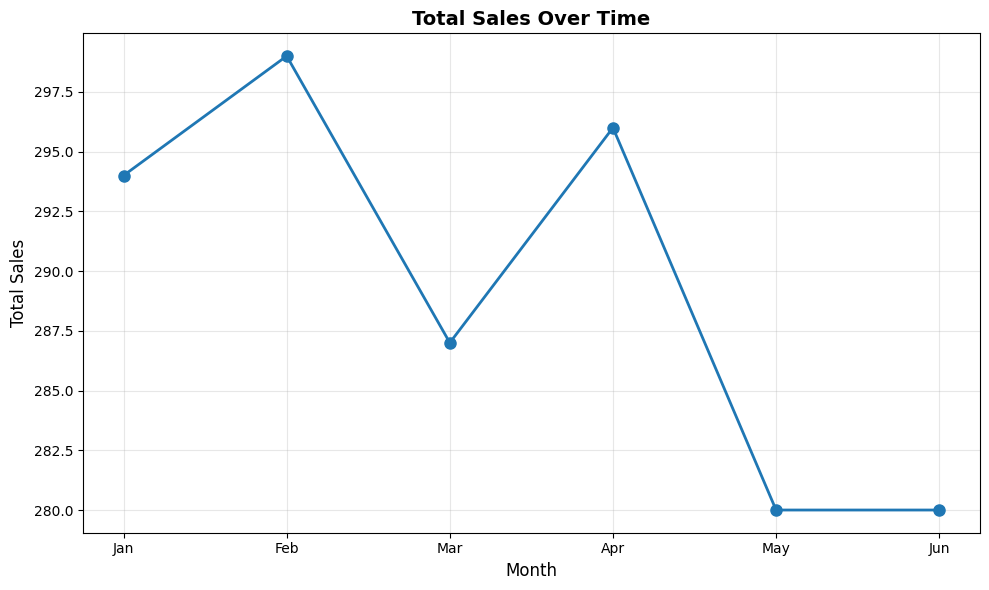

In [11]:
# -----------------------------------------
# INSTRUCTIONS: TASK 1
# -----------------------------------------
# Do not alter the code below, which creates a dataframe from which you will create line plots from
# Create a line plot using category_df that displays sales over time (using Total_Sales and Month for your axes)

# DO NOT ALTER THE CODE HERE
# The code below generates synthetic data into an object 'category_df'
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

electronics_sales = np.random.randint(120, 150, size=6)
furniture_sales = np.random.randint(80, 110, size=6)
clothing_sales = np.random.randint(50, 70, size=6)

category_df = pd.DataFrame({
    'Electronics': electronics_sales,
    'Furniture': furniture_sales,
    'Clothing': clothing_sales,
    'Month': months
})

category_df['Total_Sales'] = category_df[['Electronics', 'Furniture', 'Clothing']].sum(axis=1)



# PLACE YOUR CODE HERE
plt.figure(figsize=(10, 6))
plt.plot(category_df['Month'], category_df['Total_Sales'], marker='o', linewidth=2, markersize=8)
plt.title('Total Sales Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


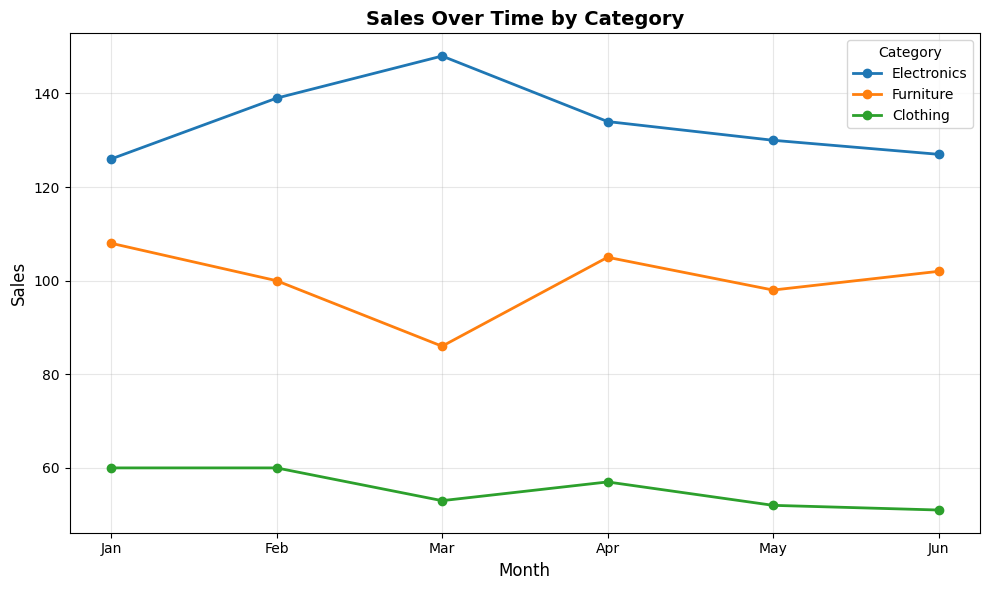

In [12]:
# -----------------------------------------
# INSTRUCTIONS: TASK 2
# -----------------------------------------
# Do not alter the code below, which creates a dataframe from which you will create line plots
# Create a line plot that displays a distinct line for sales over time for each Category type
# Each line should be a different color and use Sales and Month for the y and x axes, respectively.

melted_category_df = pd.melt(category_df, id_vars=['Month'], value_vars=['Electronics', 'Furniture', 'Clothing'],
                              var_name='Category', value_name='Sales')




# PLACE YOUR CODE HERE
plt.figure(figsize=(10, 6))

# Plot each category as a separate line
for category in melted_category_df['Category'].unique():
    category_data = melted_category_df[melted_category_df['Category'] == category]
    plt.plot(category_data['Month'], category_data['Sales'],
             marker='o', linewidth=2, markersize=6, label=category)

plt.title('Sales Over Time by Category', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend(title='Category', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

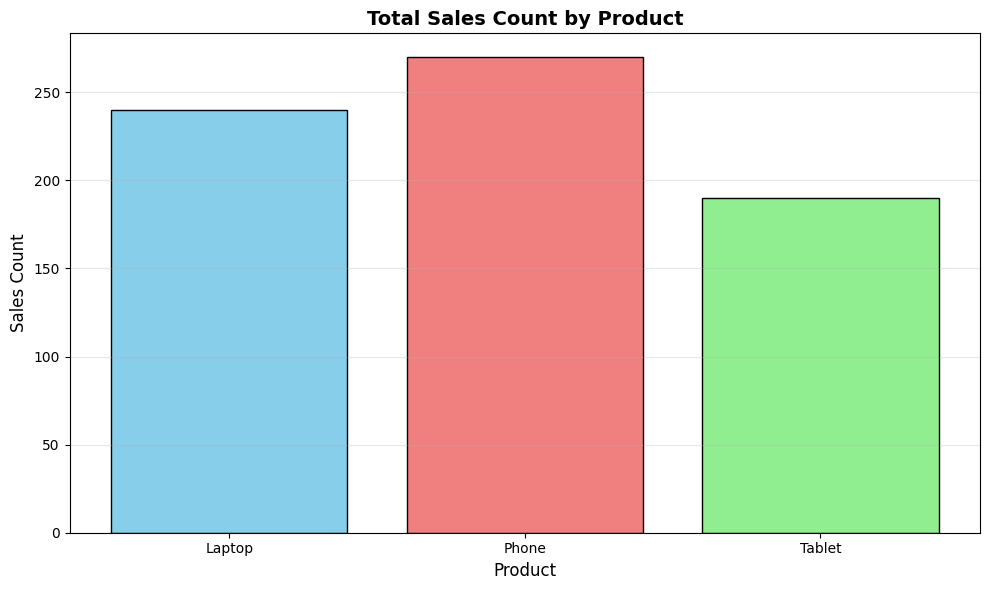

In [13]:
# -----------------------------------------
# INSTRUCTIONS: TASK 3
# -----------------------------------------
# Do not alter the code below, which creates a dataframe called 'simple_bar_df' from which you will create line plots
# Create a vertical bar plot that displays a sales count for each Product

product_types = ['Phone', 'Laptop', 'Tablet']

male_counts = np.array([180, 100, 90])
female_counts = np.array([90, 140, 100])

interaction_df = pd.DataFrame({
    'Product': product_types * 2,
    'Gender': ['Male']*3 + ['Female']*3,
    'Count': np.concatenate([male_counts, female_counts])
})

simple_bar_df = interaction_df.groupby('Product')['Count'].sum().reset_index()




# PLACE YOUR CODE HERE
plt.figure(figsize=(10, 6))
plt.bar(simple_bar_df['Product'], simple_bar_df['Count'],
        color=['skyblue', 'lightcoral', 'lightgreen'],
        edgecolor='black', linewidth=1)
plt.title('Total Sales Count by Product', fontsize=14, fontweight='bold')
plt.xlabel('Product', fontsize=12)
plt.ylabel('Sales Count', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

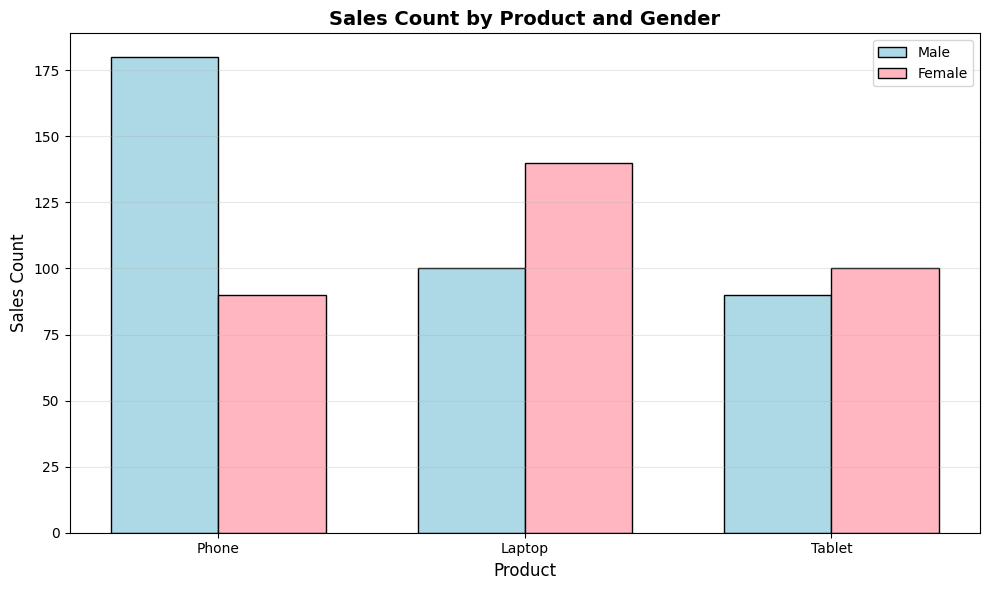

In [14]:
# -----------------------------------------
# INSTRUCTIONS: TASK 4
# -----------------------------------------
# Create a grouped bar plot that displays sales counts for each product type, where bars are grouped by gender (and varied by color)
# Use the interaction_df object from the prior code cell for convenience




# PLACE YOUR CODE HERE
plt.figure(figsize=(10, 6))

# Get unique products and prepare data
products = interaction_df['Product'].unique()
male_data = interaction_df[interaction_df['Gender'] == 'Male']
female_data = interaction_df[interaction_df['Gender'] == 'Female']

# Set up bar positions
x_pos = np.arange(len(products))
width = 0.35

# Create grouped bars
bars1 = plt.bar(x_pos - width/2, male_data['Count'], width,
                label='Male', color='lightblue', edgecolor='black')
bars2 = plt.bar(x_pos + width/2, female_data['Count'], width,
                label='Female', color='lightpink', edgecolor='black')

plt.title('Sales Count by Product and Gender', fontsize=14, fontweight='bold')
plt.xlabel('Product', fontsize=12)
plt.ylabel('Sales Count', fontsize=12)
plt.xticks(x_pos, products)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

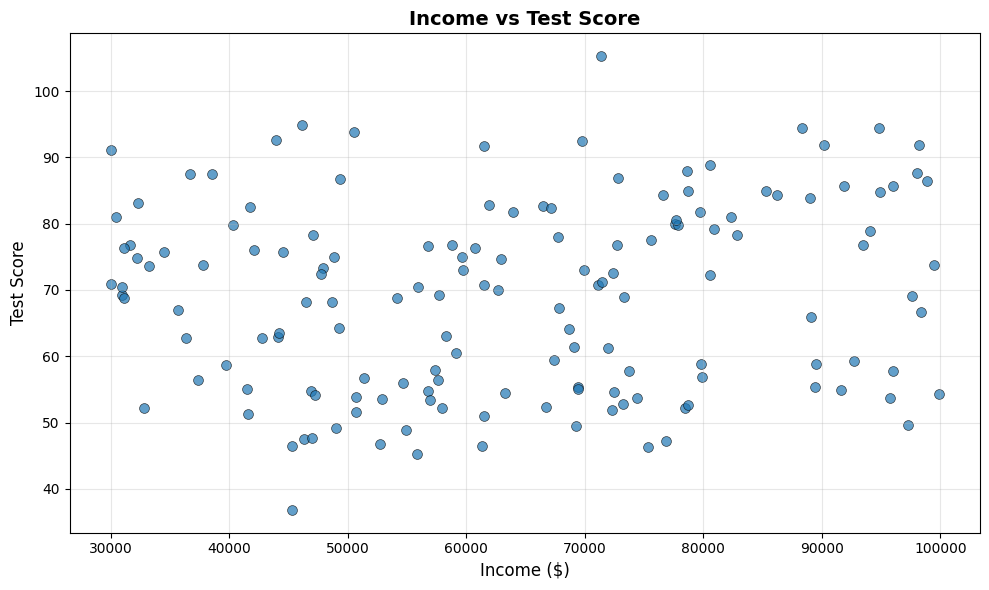

In [15]:
# -----------------------------------------
# INSTRUCTIONS: TASK 5
# -----------------------------------------
# Do not alter the code below, which creates a dataframe from which you will create scatter plots
# Create a scatter plot that displays Income (x-axis) vs. Test_Score (y-axis), using the 'scatter_df' object

n = 150
income = np.random.uniform(30_000, 100_000, n)

school_type = np.random.choice(['A', 'B', 'C'], size=n, p=[0.4, 0.3, 0.3])

test_score = []
for school in school_type:
    if school == 'A':
        test_score.append(np.random.normal(54, 6))
    elif school == 'B':
        test_score.append(np.random.normal(85, 6))
    else:
        test_score.append(np.random.normal(75, 6))

test_score = np.array(test_score) + (income - income.mean()) / 10_000

study_time = 20 + (income/100_000) * 80 + np.random.normal(0, 5, n)

scatter_df = pd.DataFrame({
    'Income': income,
    'Test_Score': test_score,
    'School_Type': school_type,
    'Study_Time': study_time
})



# PLACE YOUR CODE HERE
plt.figure(figsize=(10, 6))
plt.scatter(scatter_df['Income'], scatter_df['Test_Score'],
           alpha=0.7, s=50, edgecolors='black', linewidth=0.5)
plt.title('Income vs Test Score', fontsize=14, fontweight='bold')
plt.xlabel('Income ($)', fontsize=12)
plt.ylabel('Test Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

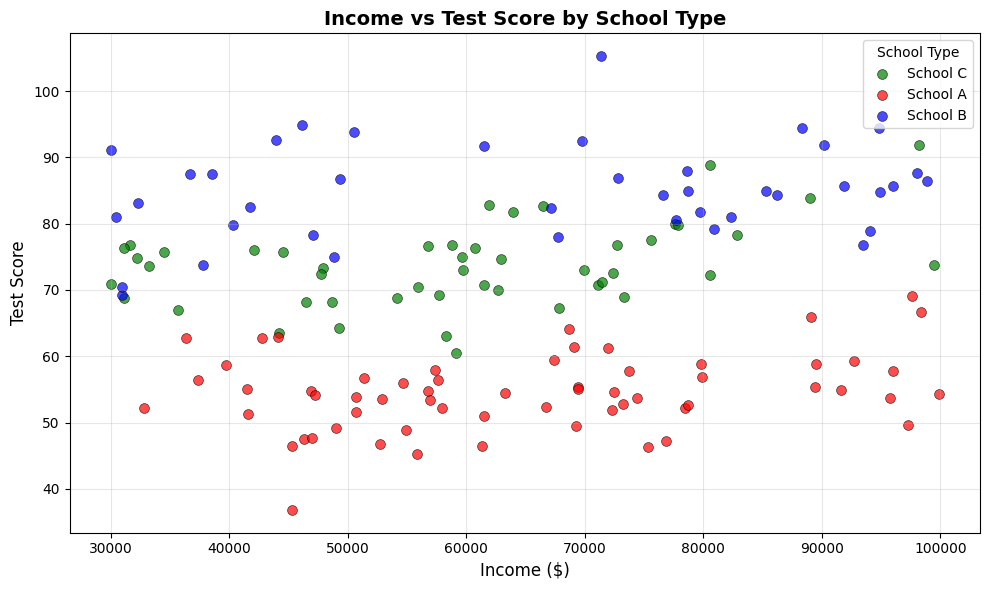

In [16]:
# -----------------------------------------
# INSTRUCTIONS: TASK 6
# -----------------------------------------
# Create a scatter plot that displays income (x-axis) vs. test scores (y-axis), and also varies color of points by school type
# Again, use 'scatter_df'.



# PLACE YOUR CODE HERE
plt.figure(figsize=(10, 6))

# Create scatter plot with colors based on school type
colors = {'A': 'red', 'B': 'blue', 'C': 'green'}
for school in scatter_df['School_Type'].unique():
    school_data = scatter_df[scatter_df['School_Type'] == school]
    plt.scatter(school_data['Income'], school_data['Test_Score'],
               c=colors[school], label=f'School {school}',
               alpha=0.7, s=50, edgecolors='black', linewidth=0.5)

plt.title('Income vs Test Score by School Type', fontsize=14, fontweight='bold')
plt.xlabel('Income ($)', fontsize=12)
plt.ylabel('Test Score', fontsize=12)
plt.legend(title='School Type')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

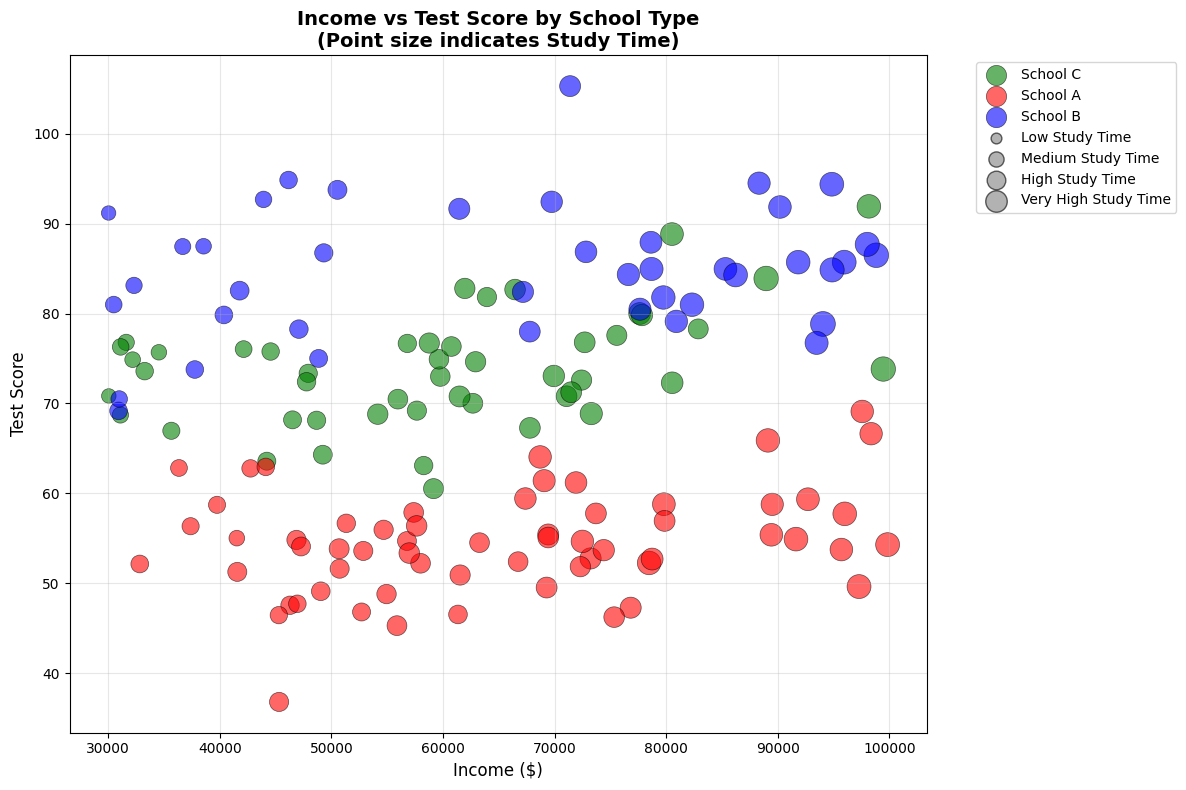

In [17]:
# -----------------------------------------
# INSTRUCTIONS: TASK 7
# -----------------------------------------
# Create a scatter plot that displays income (x-axis) vs. test scores (y-axis),
# and also varies color of points by school type, and varies size by study time
# Points should become larger as Study_Time increases
# Again, use 'scatter_df'.


# PLACE YOUR CODE HERE
plt.figure(figsize=(12, 8))

# Create scatter plot with colors based on school type and size based on study time
colors = {'A': 'red', 'B': 'blue', 'C': 'green'}
for school in scatter_df['School_Type'].unique():
    school_data = scatter_df[scatter_df['School_Type'] == school]
    plt.scatter(school_data['Income'], school_data['Test_Score'],
               c=colors[school], label=f'School {school}',
               s=school_data['Study_Time'] * 3,  # Scale study time for better visibility
               alpha=0.6, edgecolors='black', linewidth=0.5)

plt.title('Income vs Test Score by School Type\n(Point size indicates Study Time)',
          fontsize=14, fontweight='bold')
plt.xlabel('Income ($)', fontsize=12)
plt.ylabel('Test Score', fontsize=12)
plt.legend(title='School Type')
plt.grid(True, alpha=0.3)

# Add a size legend to explain the study time dimension
sizes = [20, 40, 60, 80]
size_labels = ['Low', 'Medium', 'High', 'Very High']
for i, (size, label) in enumerate(zip(sizes, size_labels)):
    plt.scatter([], [], s=size*3, c='gray', alpha=0.6, edgecolors='black',
               label=f'{label} Study Time')

# Position legends
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

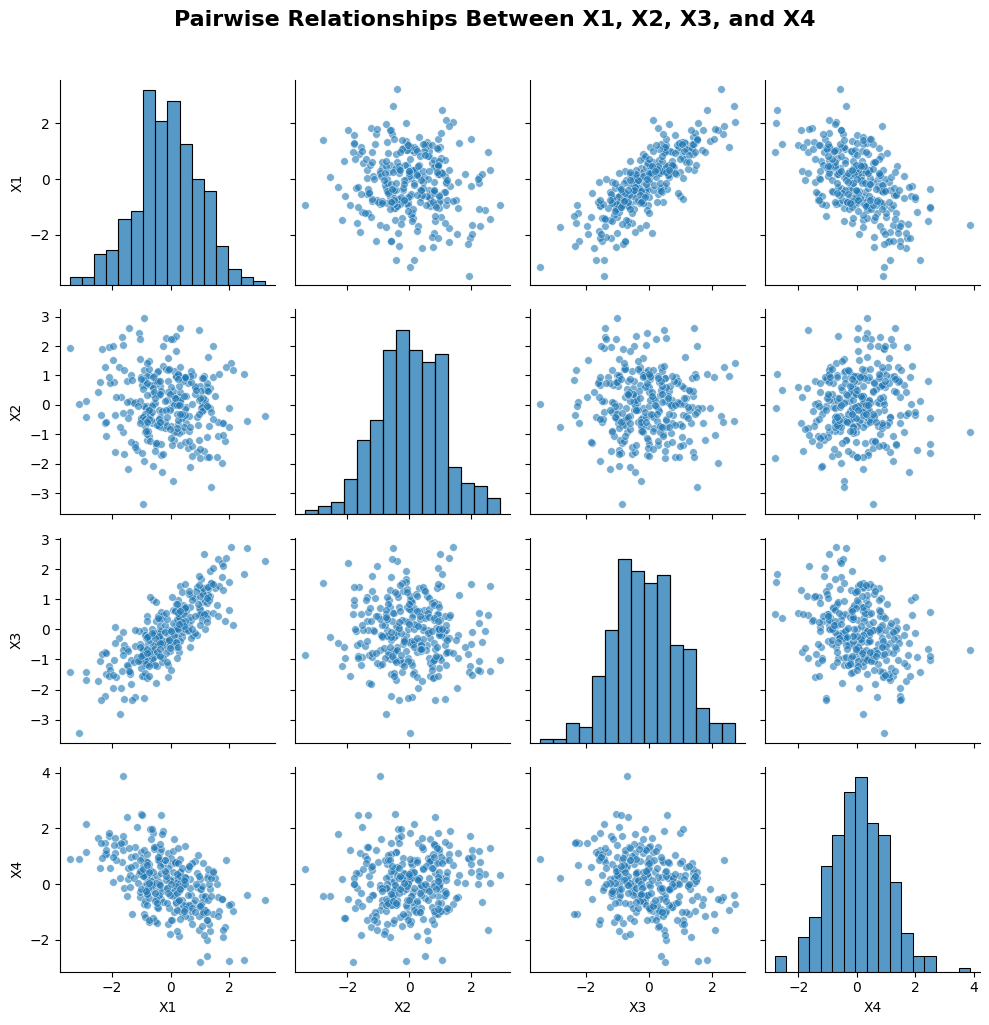

In [18]:
# -----------------------------------------
# INSTRUCTIONS: TASK 8
# -----------------------------------------
# Do not alter the code below, which creates a dataframe from which you will create a pairs plot
# Create a pairs plot that displays pairwise scatterplots of X1, X2, X3, and X4.
# Use the pairplot function in Seaborn and the pairs_df object to construct this plot.

cov_matrix = [
    [1,  0.0,  0.8, -0.5],  # Correlations for X1
    [0.0, 1,   0.0,  0.0],  # Correlations for X2
    [0.8, 0.0, 1,  -0.3],   # Correlations for X3
    [-0.5, 0.0, -0.3, 1]    # Correlations for X4
]

mean = [0, 0, 0, 0]
n_samples = 300

multi_data = np.random.multivariate_normal(mean, cov_matrix, size=n_samples)

pairs_df = pd.DataFrame(multi_data, columns=['X1', 'X2', 'X3', 'X4'])



# PLACE YOUR CODE HERE
# Create a pairs plot showing pairwise relationships between all variables
sns.pairplot(pairs_df, diag_kind='hist', plot_kws={'alpha': 0.6, 's': 30})
plt.suptitle('Pairwise Relationships Between X1, X2, X3, and X4',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()